<a href="https://colab.research.google.com/github/gpasky/MAT-421/blob/main/ModH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gabriel Pascual

**22.4 Numerical Error and Instability**

Accuracy ($O(h^p)$): an algorithms ability to get close to the exact solution(unknown) as a function of the step size h

Stability: ability to keep the error from growing as it integrates forward in time. Integration algorithms can be stable/unstable

Example: Use Euler Explicit/Implicit and Trapezoidal formulas to integrate the pendulum equation over [0,3] with h = 0.1 with the initial solution $S_0=\begin{bmatrix} 1 \\ 0\end{bmatrix}$ and model parameters $\sqrt\frac{g}{l}=3$

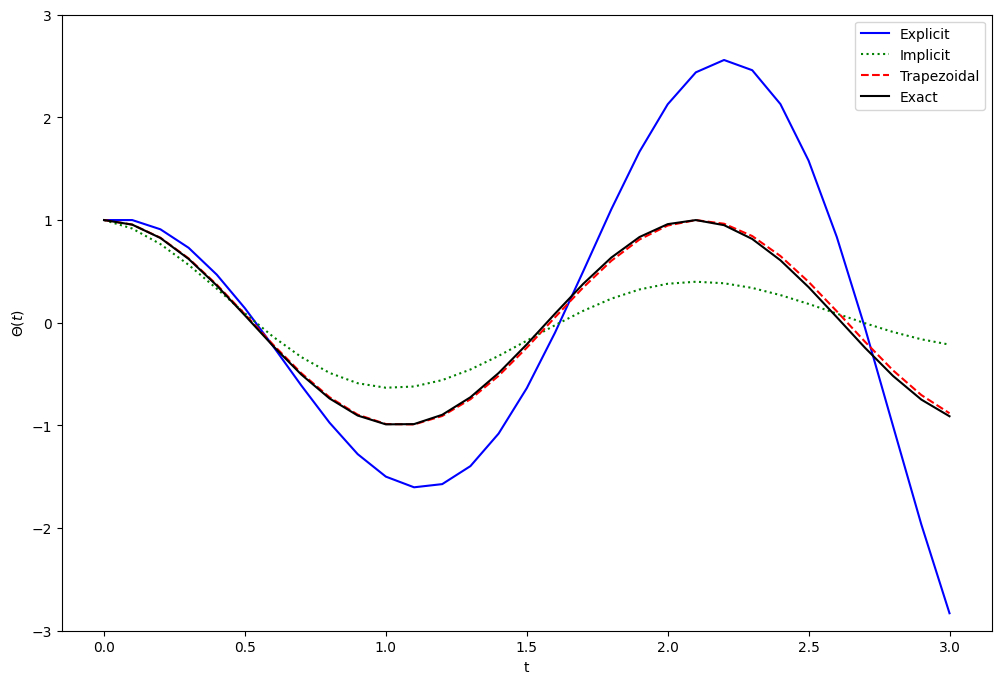

In [8]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

h = 0.1

t = np.arange(0,3.1,h)

w = 3
s0 = np.array([[1],[0]])

m_e = np.array([[1,h],
                [-w**2*h, 1]])

m_i = inv(np.array([[1,-h],
                [w**2*h, 1]]))

m_t = np.dot(inv(np.array([[1, -h/2],
                           [w**2*h/2,1]])), np.array([[1,h/2],[-w**2*h/2,1]]))

s_e = np.zeros((len(t),2))
s_i = np.zeros((len(t),2))
s_t = np.zeros((len(t),2))

s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
  s_e[j+1, :] = np.dot(m_e,s_e[j, :])
  s_i[j+1, :] = np.dot(m_i,s_i[j, :])
  s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12,8))
plt.plot(t,s_e[:,0], 'b-')
plt.plot(t,s_i[:,0], 'g:')
plt.plot(t,s_t[:,0], 'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3,3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

**22.5 Predictor-Corrector Methods**

Predictor-corrector methods: improves the approximation accuracy of non-predictor-corrector methods by retrieving $F(t,S(T))$ at different locations/predictions and then taking the weighted average of the results to update/correct the state.

Predictor: explicit formula that estimates the solution at $t_{j+1}$ to get a solution.

Corrector: Uses $S(t_{j+1})$ to improve the accuracy/calculate a more accurate solution.

Example:
Midpoint method: $S(t_j+\frac{h}{2})=S(t_j)+\frac{h}{2}F(t_j,S(t_j))$

*   Predictor: $F(t,S(T))$ is used to predict the solution of the
midpoint between $[t_j,t_{j+1}]$

$S(t_j+\frac{h}{2})=S(t_j)+ hF(t_j+\frac{h}{2},S(t_j+\frac{h}{2})$

*   Corrector: finds the solution at $S(t_{j+1})$ from $S(t_j)$ from the derivative $S(t_j+\frac{h}{2})$